In [1]:
import scipy.sparse
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import itertools

In [2]:
X_train = scipy.sparse.load_npz('X_train_features_sparse_matrix.npz')

In [3]:
X_test = scipy.sparse.load_npz('X_test_features_sparse_matrix.npz')

In [4]:
y_train = []
with open('y_train_class_label.txt', 'r') as f:
    for i in iter(f):
        y_train.append(int(i.strip('\n')))

In [5]:
y_test = []
with open('y_test_class_label.txt', 'r') as f:
    for i in iter(f):
        y_test.append(int(i.strip('\n')))

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    '''if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)'''

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<pre>

</pre>
<h1 align='center' style='color:red'>SVM (Linear, RBF)</h1>
<pre>

</pre>

/home/soumya/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/soumya/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



 The best grid is as follows: 

SVC(C=3, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Classification of the train samples
Evaluation using Precision, Recall and F-measure

 Accuracy:1.0

 Precision:1.0

 Recall:1.0

 F-measure:1.0
Classification of the test samples
Evaluation using Precision, Recall and F-measure

 Accuracy:0.8985942304876263

 Precision:0.8985942304876263

 Recall:0.8985942304876263

 F-measure:0.8985942304876263


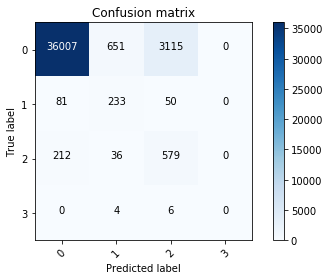

In [7]:
if __name__ == '__main__':
    svr = svm.SVC(class_weight='balanced')
    param_grid =[{'kernel':['linear'],'C':[int(i) for i in range(1,100)]},{'kernel':['rbf'],'C':[1,10,100]},]  # Sets of parameters
    grid = GridSearchCV(svr,param_grid,n_jobs=7, cv=10)          
    grid.fit(X_train,y_train)    
    clf= grid.best_estimator_                   # Best grid
    print ('\n The best grid is as follows: \n')
    print (grid.best_estimator_ )

    print ('Classification of the train samples')
    predicted_class_label = clf.predict(X_train)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_train, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_train, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_train, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_train, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))

    print ('Classification of the test samples')
    predicted_class_label = clf.predict(X_test)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_test, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_test, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_test, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_test, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))
    cnf_matrix = confusion_matrix(y_test,predicted_class_label)
    #print(cnf_matrix)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3])

<pre>

</pre>
<h1 align='center' style='color:red'>SVM (Linear Unbalanced)</h1>
<pre>

</pre>

/home/soumya/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



 The best grid is as follows: 

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Classification of the train samples
Evaluation using Precision, Recall and F-measure

 Accuracy:1.0

 Precision:1.0

 Recall:1.0

 F-measure:1.0
Classification of the test samples
Evaluation using Precision, Recall and F-measure

 Accuracy:0.8916630058085615

 Precision:0.8916630058085615

 Recall:0.8916630058085615

 F-measure:0.8916630058085614


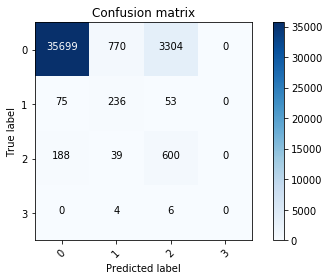

In [8]:
if __name__ == '__main__':
    svr = svm.SVC()
    param_grid =[{'kernel':['linear'],'C':[1,10,100]},]  # Sets of parameters
    grid = GridSearchCV(svr,param_grid,n_jobs=7, cv=10)          
    grid.fit(X_train,y_train)    
    clf= grid.best_estimator_                   # Best grid
    print ('\n The best grid is as follows: \n')
    print (grid.best_estimator_ )

    print ('Classification of the train samples')
    predicted_class_label = clf.predict(X_train)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_train, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_train, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_train, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_train, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))

    print ('Classification of the test samples')
    predicted_class_label = clf.predict(X_test)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_test, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_test, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_test, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_test, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))
    cnf_matrix = confusion_matrix(y_test,predicted_class_label)
    #print(cnf_matrix)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3])

<pre>

</pre>
<h1 align='center' style='color:red'>SVM (Linear Balanced)</h1>
<pre>

</pre>

/home/soumya/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



 The best grid is as follows: 

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Classification of the train samples
Evaluation using Precision, Recall and F-measure

 Accuracy:1.0

 Precision:1.0

 Recall:1.0

 F-measure:1.0
Classification of the test samples
Evaluation using Precision, Recall and F-measure

 Accuracy:0.8949821838238883

 Precision:0.8949821838238883

 Recall:0.8949821838238883

 F-measure:0.8949821838238883


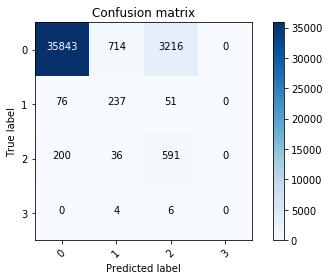

In [9]:
if __name__ == '__main__':
    svr = svm.SVC(class_weight='balanced')
    param_grid =[{'kernel':['linear'],'C':[1,10,100]},]  # Sets of parameters
    grid = GridSearchCV(svr,param_grid,n_jobs=7, cv=10)          
    grid.fit(X_train,y_train)    
    clf= grid.best_estimator_                   # Best grid
    print ('\n The best grid is as follows: \n')
    print (grid.best_estimator_ )

    print ('Classification of the train samples')
    predicted_class_label = clf.predict(X_train)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_train, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_train, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_train, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_train, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))

    print ('Classification of the test samples')
    predicted_class_label = clf.predict(X_test)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_test, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_test, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_test, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_test, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))
    cnf_matrix = confusion_matrix(y_test,predicted_class_label)
    #print(cnf_matrix)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3])

<pre>

</pre>
<h1 align='center' style='color:red'>SoftMax</h1>
<pre>

</pre>

/home/soumya/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/soumya/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/soumya/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



 The best grid is as follows: 

LogisticRegression(C=50, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
Classification of the train samples
Evaluation using Precision, Recall and F-measure

 Accuracy:1.0

 Precision:1.0

 Recall:1.0

 F-measure:1.0
Classification of the test samples
Evaluation using Precision, Recall and F-measure

 Accuracy:0.9027187972860838

 Precision:0.9027187972860838

 Recall:0.9027187972860838

 F-measure:0.9027187972860838


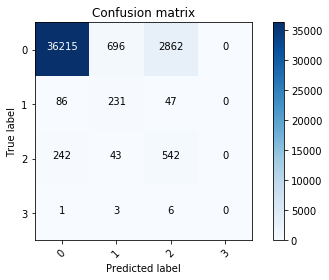

In [10]:
if __name__ == '__main__':
    logReg = LogisticRegression(class_weight='balanced')
    param_grid =[{'C':[10e-5,10e-4,1,10,20,50,100]},]  # Sets of parameters
    grid = GridSearchCV(logReg,param_grid,n_jobs=7, cv=10)          
    grid.fit(X_train,y_train)    
    clf= grid.best_estimator_                   # Best grid
    print ('\n The best grid is as follows: \n')
    print (grid.best_estimator_ )

    print ('Classification of the train samples')
    predicted_class_label = clf.predict(X_train)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_train, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_train, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_train, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_train, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))

    print ('Classification of the test samples')
    predicted_class_label = clf.predict(X_test)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_test, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_test, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_test, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_test, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))
    cnf_matrix = confusion_matrix(y_test,predicted_class_label)
    #print(cnf_matrix)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3])

<pre>

</pre>
<h1 align='center' style='color:red'>Decision Tree</h1>
<pre>

</pre> 

/home/soumya/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



 The best grid is as follows: 

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
Classification of the train samples
Evaluation using Precision, Recall and F-measure

 Accuracy:1.0

 Precision:1.0

 Recall:1.0

 F-measure:1.0
Classification of the test samples
Evaluation using Precision, Recall and F-measure

 Accuracy:0.8993019963879534

 Precision:0.8993019963879534

 Recall:0.8993019963879534

 F-measure:0.8993019963879534


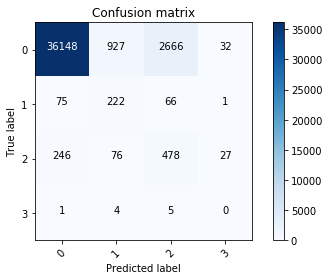

In [11]:
if __name__ == '__main__':
    clf = DecisionTreeClassifier(random_state=0, class_weight='balanced')
    param_grid =[{'max_depth':[None]},]  # Sets of parameters
    grid = GridSearchCV(clf,param_grid,n_jobs=7, cv=10)          
    grid.fit(X_train,y_train)    
    clf= grid.best_estimator_                   # Best grid
    print ('\n The best grid is as follows: \n')
    print (grid.best_estimator_ )

    print ('Classification of the train samples')
    predicted_class_label = clf.predict(X_train)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_train, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_train, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_train, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_train, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))

    print ('Classification of the test samples')
    predicted_class_label = clf.predict(X_test)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_test, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_test, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_test, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_test, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))
    cnf_matrix = confusion_matrix(y_test,predicted_class_label)
    #print(cnf_matrix)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3])

<pre>

</pre>
<h1 align='center' style='color:red'>Random Forest</h1>
<pre>

</pre> 

/home/soumya/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



 The best grid is as follows: 

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
Classification of the train samples
Evaluation using Precision, Recall and F-measure

 Accuracy:1.0

 Precision:1.0

 Recall:1.0

 F-measure:1.0
Classification of the test samples
Evaluation using Precision, Recall and F-measure

 Accuracy:0.9577781031873871

 Precision:0.9577781031873871

 Recall:0.9577781031873871

 F-measure:0.9577781031873871


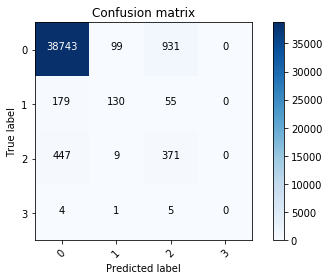

In [12]:
if __name__ == '__main__':
    clf = RandomForestClassifier(n_estimators=100,random_state=0, class_weight='balanced')
    param_grid =[{'max_depth':[None,1000,5000,10000]},]  # Sets of parameters
    grid = GridSearchCV(clf,param_grid,n_jobs=-1, cv=10)          
    grid.fit(X_train,y_train)    
    clf= grid.best_estimator_                   # Best grid
    print ('\n The best grid is as follows: \n')
    print (grid.best_estimator_ )

    print ('Classification of the train samples')
    predicted_class_label = clf.predict(X_train)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_train, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_train, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_train, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_train, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))

    print ('Classification of the test samples')
    predicted_class_label = clf.predict(X_test)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_test, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_test, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_test, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_test, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))
    cnf_matrix = confusion_matrix(y_test,predicted_class_label)
    #print(cnf_matrix)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3])

<pre>

</pre>
<h1 align='center' style='color:red'>Multi Layer Perceptron</h1>
<pre>

</pre> 

/home/soumya/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)



 The best grid is as follows: 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Classification of the train samples
Evaluation using Precision, Recall and F-measure

 Accuracy:1.0

 Precision:1.0

 Recall:1.0

 F-measure:1.0
Classification of the test samples
Evaluation using Precision, Recall and F-measure

 Accuracy:0.8713818519060867

 Precision:0.8713818519060867

 Recall:0.8713818519060867

 F-measure:0.8713818519060867


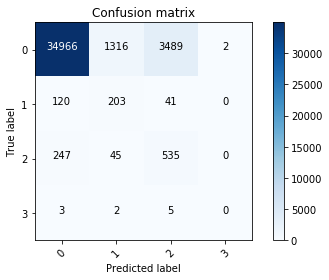

In [7]:
if __name__ == '__main__':
    clf = MLPClassifier()
    param_grid =[{'hidden_layer_sizes':[(100,),(200,),(50,50,50)],'activation':['relu','tanh','logistic']},]  # Sets of parameters
    grid = GridSearchCV(clf,param_grid,n_jobs=7, cv=10)          
    grid.fit(X_train,y_train)    
    clf= grid.best_estimator_                   # Best grid
    print ('\n The best grid is as follows: \n')
    print (grid.best_estimator_ )

    print ('Classification of the train samples')
    predicted_class_label = clf.predict(X_train)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_train, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_train, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_train, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_train, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))

    print ('Classification of the test samples')
    predicted_class_label = clf.predict(X_test)     
    predicted_class_label = list(predicted_class_label)

    print ('Evaluation using Precision, Recall and F-measure')
    ac=accuracy_score(y_test, predicted_class_label)
    print ('\n Accuracy:'+str(ac))
    pr=precision_score(y_test, predicted_class_label, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_test, predicted_class_label, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_test, predicted_class_label, average='micro') 
    print ('\n F-measure:'+str(fm))
    cnf_matrix = confusion_matrix(y_test,predicted_class_label)
    #print(cnf_matrix)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3])